In [1]:
import pandas as pd

baku = pd.read_csv('Baku_final-laps19-24.csv')

pd.options.display.max_columns = None  # Show all columns
pd.options.display.expand_frame_repr = False  # Disable line wrapping

In [3]:
baku.columns

Index(['Driver', 'DriverNumber', 'FormattedLapTime', 'LapNumber', 'Stint',
       'TyreLife', 'Compound', 'Team', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [4]:
print(baku.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound             Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed
0    GAS            10         1:53:143        2.0    1.0       2.0   MEDIUM  Red Bull Racing     20.3      48.1    1013.9     False       42.4            221        0.6
1    GAS            10         1:48:425        3.0    1.0       3.0   MEDIUM  Red Bull Racing     20.3      49.5    1013.8     False       41.8            208        1.1
2    GAS            10         1:48:557        4.0    1.0       4.0   MEDIUM  Red Bull Racing     20.0      49.6    1013.9     False       41.8            218        1.7
3    GAS            10         1:52:738        5.0    1.0       5.0   MEDIUM  Red Bull Racing     20.1      50.8    1014.0     False       41.5            218        1.6
4    GAS            10         1:52:123        6.0    1.0       6.0   MEDIUM  Red Bull Racing     20.1      51.1    1013.9     False       41.3       

In [5]:
compound_mapping = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2}

# Apply the mapping to the 'Compound' column
baku['CompoundNum'] = baku['Compound'].map(compound_mapping)

print(baku.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound             Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  CompoundNum
0    GAS            10         1:53:143        2.0    1.0       2.0   MEDIUM  Red Bull Racing     20.3      48.1    1013.9     False       42.4            221        0.6            1
1    GAS            10         1:48:425        3.0    1.0       3.0   MEDIUM  Red Bull Racing     20.3      49.5    1013.8     False       41.8            208        1.1            1
2    GAS            10         1:48:557        4.0    1.0       4.0   MEDIUM  Red Bull Racing     20.0      49.6    1013.9     False       41.8            218        1.7            1
3    GAS            10         1:52:738        5.0    1.0       5.0   MEDIUM  Red Bull Racing     20.1      50.8    1014.0     False       41.5            218        1.6            1
4    GAS            10         1:52:123        6.0    1.0       6.0   MEDIUM  Red Bul

In [6]:
baku['Rainfall'] = baku['Rainfall'].astype(int)

print(baku.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound             Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  CompoundNum
0    GAS            10         1:53:143        2.0    1.0       2.0   MEDIUM  Red Bull Racing     20.3      48.1    1013.9         0       42.4            221        0.6            1
1    GAS            10         1:48:425        3.0    1.0       3.0   MEDIUM  Red Bull Racing     20.3      49.5    1013.8         0       41.8            208        1.1            1
2    GAS            10         1:48:557        4.0    1.0       4.0   MEDIUM  Red Bull Racing     20.0      49.6    1013.9         0       41.8            218        1.7            1
3    GAS            10         1:52:738        5.0    1.0       5.0   MEDIUM  Red Bull Racing     20.1      50.8    1014.0         0       41.5            218        1.6            1
4    GAS            10         1:52:123        6.0    1.0       6.0   MEDIUM  Red Bul

In [7]:
def convert_to_seconds(lap_time):
    minutes, seconds, milliseconds = map(int, lap_time.split(":"))
    total_seconds = minutes * 60 + seconds + milliseconds / 1000
    return total_seconds

# Apply the conversion
baku['LapTimeSeconds'] = baku['FormattedLapTime'].apply(convert_to_seconds)

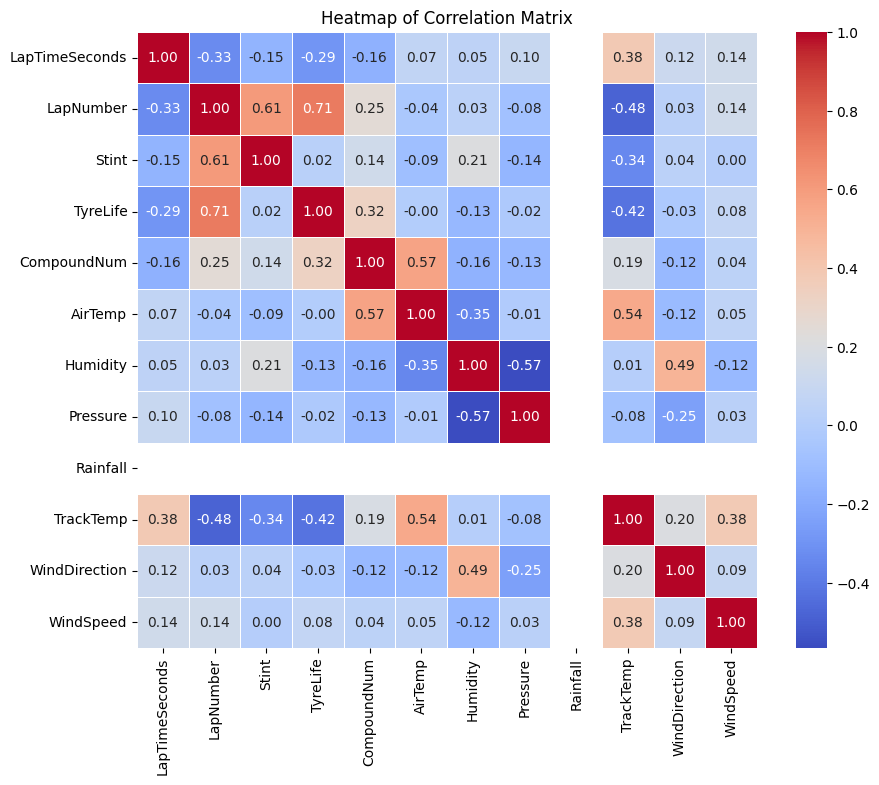

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

params = baku[['LapTimeSeconds', 'LapNumber', 'Stint','TyreLife', 'CompoundNum', 'AirTemp', 'Humidity', 'Pressure','Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']]

corr_matrix = params.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()